In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

63.91406920235667 42.800280201192464
-67.0394619572874 -93.32723540648772
-88.19830708868325 16.71476843410258
-41.38652957003845 -54.65248535079408
88.015040139528 -78.86264646124663
42.364365407325266 148.19733362197775
50.16869435784437 -41.02753047916616
33.35918867898623 -97.68896670666987
55.52822610152754 150.74495257671504
-11.05819658083729 -162.47765365968064
53.71216677748353 -68.58103742714076
63.33913736522007 15.232857622493924
38.48275004950247 58.716842735381334
-46.758700199742314 81.15218054058346
-81.47238362158384 -149.1975945585972
54.45786074788532 -51.31386749847596
41.94338900273095 80.17384976547697
1.892867796394512 87.47320096137088
-18.409629656762988 -13.896937954794112
89.94110791336837 130.57716351951353
64.54751774515034 158.71948002147474
-85.53400423422285 -75.5116965787058
50.66530568375509 23.73936250629123
78.99742133864967 -94.81996345706048
-77.25994074218941 -126.43258368995694
55.638657544030764 -48.30272819440498
-53.37111423673611 173.18366784

In [31]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [33]:
#Import the requests library
import requests

#Import  the API key.
from config import weather_api_key

In [34]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [35]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [36]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lukovetskiy
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | azle
Processing Record 9 of Set 1 | magadan
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | port-cartier
Processing Record 12 of Set 1 | ostersund
Processing Record 13 of Set 1 | annau
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | saint anthony
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | hambantota
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | evensk
Processing Record 22 of Set 1 | ushuaia
Processing Re

Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | saint stephen
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | vilhena
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | wyndham
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | santa vitoria do palmar
Processing Record 50 of Set 4 | stoyba
City not found. Skipping...
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | labuan
Processing Record 3 of Set 5 | sambava
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | asgabat
Processing Record 6 of Set 5 | cabedelo
Processing Record 7 of Set 5 | kaduna
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | berlevag
Processing Record 10 of Set 5 | victoria
Processing Record 11 of Set 5 | la asuncion
Proces

Processing Record 29 of Set 8 | ayagoz
Processing Record 30 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | poya
Processing Record 33 of Set 8 | nador
Processing Record 34 of Set 8 | kasane
Processing Record 35 of Set 8 | bonnyville
Processing Record 36 of Set 8 | antalaha
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | nicoya
Processing Record 39 of Set 8 | peachland
Processing Record 40 of Set 8 | ambarawa
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | ahuimanu
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | pontianak
Processing Record 47 of Set 8 | boca do acre
Processing Record 48 of Set 8 | bathsheba
Processing Record 49 of Set 8 | taoudenni
Processing Record 50 of Set 8 | pedernales
Processing Record 1 of Set 9 | sawtell
Processing Record 2 of Se

Processing Record 17 of Set 12 | dinghai
Processing Record 18 of Set 12 | kimbe
Processing Record 19 of Set 12 | stepnyak
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | saint-augustin
Processing Record 22 of Set 12 | lishui
Processing Record 23 of Set 12 | tagbac
Processing Record 24 of Set 12 | cockburn town
Processing Record 25 of Set 12 | carbonia
Processing Record 26 of Set 12 | jinchang
Processing Record 27 of Set 12 | likhoslavl
Processing Record 28 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 29 of Set 12 | mananjary
Processing Record 30 of Set 12 | san patricio
Processing Record 31 of Set 12 | broome
Processing Record 32 of Set 12 | puerto cabezas
Processing Record 33 of Set 12 | plettenberg bay
Processing Record 34 of Set 12 | henderson
Processing Record 35 of Set 12 | maryborough
Processing Record 36 of Set 12 | yumen
Processing Record 37 of Set 12 | guilin
Processing Record 38 of Set 12 | kosh-agach
Processing Record 

In [37]:
len(city_data)

560

In [59]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lukovetskiy,64.2956,41.9211,73.31,50,99,2.57,RU,2022-07-10 16:03:34
1,Punta Arenas,-53.1500,-70.9167,33.42,72,9,1.25,CL,2022-07-10 16:02:26
2,Bredasdorp,-34.5322,20.0403,53.17,91,100,5.30,ZA,2022-07-10 16:03:35
3,Mar Del Plata,-38.0023,-57.5575,59.09,74,100,5.99,AR,2022-07-10 16:03:35
4,Qaanaaq,77.4840,-69.3632,42.71,69,100,2.73,GL,2022-07-10 16:03:35
5,Nemuro,43.3236,145.5750,57.11,100,100,8.21,JP,2022-07-10 16:03:36
6,Nanortalik,60.1432,-45.2371,43.97,85,95,6.08,GL,2022-07-10 16:03:36
7,Azle,32.8951,-97.5459,95.70,48,0,8.01,US,2022-07-10 16:03:36
8,Magadan,59.5667,150.8000,56.12,82,4,2.73,RU,2022-07-10 16:03:37
9,Port-Cartier,50.0334,-66.8654,59.76,48,69,8.88,CA,2022-07-10 16:03:37


In [60]:
#Reorder columns Version1
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_df = city_data_df[new_column_order]

##Reorder columns Version2
city_data_df = city_data_df.reindex(columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lukovetskiy,RU,2022-07-10 16:03:34,64.2956,41.9211,73.31,50,99,2.57
1,Punta Arenas,CL,2022-07-10 16:02:26,-53.1500,-70.9167,33.42,72,9,1.25
2,Bredasdorp,ZA,2022-07-10 16:03:35,-34.5322,20.0403,53.17,91,100,5.30
3,Mar Del Plata,AR,2022-07-10 16:03:35,-38.0023,-57.5575,59.09,74,100,5.99
4,Qaanaaq,GL,2022-07-10 16:03:35,77.4840,-69.3632,42.71,69,100,2.73


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

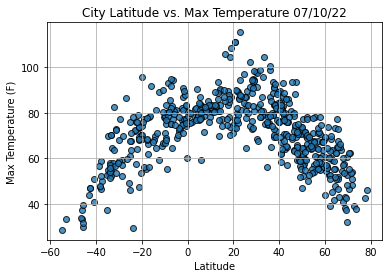

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

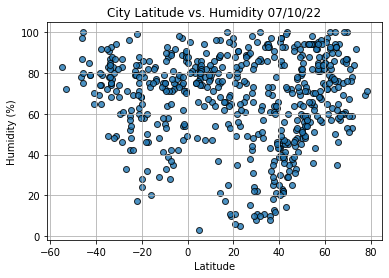

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

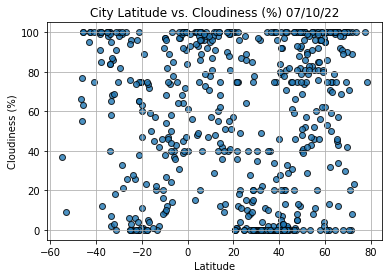

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

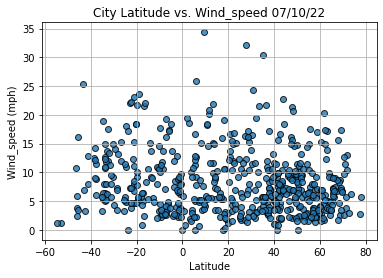

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()